# Problema 5.6

**Problema** 5-6

La siguiente tabla presenta los valores de tensión interfacial de soluciones de agua (1) y etanol (2) determinados por Butler y Wightman junto con la presión de vapor de etanol a 25°C en función de $x_2$.



\begin{array}{|c|c|c|}
\hline
x_{2} & \gamma / (10^{–3}N m^{−1}) & log \ p_{2}/Torr & x_{2} & \gamma / (10^{–3}N m^{−1}) & log \ p_{2}/Torr \\
\hline
1.00&21.93&1.771&0.15&32.20&1.372 \\
\hline
0.80&23.26&1.679&0.12&34.42&1.316 \\
\hline
0.60&24.67&1.600&0.10&36.72&1.256\\
\hline
0.40&26.43&1.529&0.064&42.13&1.097\\
\hline
0.30&27.60&1.492&0.040&47.86&0.908\\
\hline
0.25&28.49&1.467&0.020&55.57&0.602\\
\hline
0.20&29.97&1.428&0&72.75&---\\
\hline
\end{array}

a) Calcule $\Gamma_{2(1)}$ (mol cm$^{−2}$) en función de $x_2$ y decida si el alcohol se encuentra en exceso o en defecto en la superficie en relación con la fase líquida. 

b) Deduzca una ecuación que vincule $\Gamma_{1(2)}$ y $\Gamma_{2(1)}$ (por definición $\Gamma_{1(1)}=\Gamma_{2(2)}=0$). Calcule $\Gamma_{1(2)}$ y discuta los resultados. 

c) Estime el exceso superficial $\Gamma_{2(1)}$  de una solución con $x_2 = 0,11$ considerando: i) que la solución es ideal y ii) usando los datos de presión de vapor. ¿Qué error relativo se comete en el cálculo de $\Gamma_{2(1)}$ al suponer que la solución es ideal? 

d) Pedro, un inquieto alumno de QFII, compró un detector de humedad cuyo manual afirmaba que era altamente selectivo a agua. Haciendo uso del detector determinó, en la solución del inciso c), $\Gamma_{1(2)} = −5,10^{−10}$ mol m$^{−2}$. ¿Hizo Pedro una buena compra? Justifique su respuesta.  

**Resolución (items a y c):**

**a)** Nos basaremos en la ecuación de la isoterma de Gibbs:

$$
\Gamma_{2(1)}=-\frac{1}{RT} \left ( \frac{\partial \gamma}{\partial \ln a{_{2}}} \right )_{T}
$$

Ajustaremos $\gamma$ como función de $\ln a_{2}$ por un polinomio de grado 4 y derivaremos la expresión analítica. ¿Cómo determinaría el grado mínimo del polinomio a ajustar?

Comencemos por importar algunas bibliotecas y cargar los datos en nuestro código:

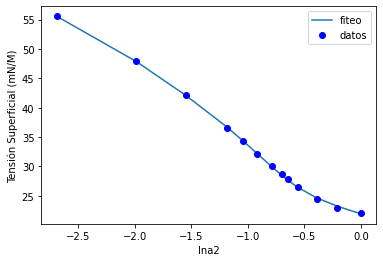

R2 para ajuste:  0.9997125213744469


In [ ]:
import numpy as np #para hacer cuentas y usar sus arrays, que son muy versátiles
import matplotlib.pyplot as plt #para graficar
from scipy.optimize import curve_fit #para hacer ajustes
from sklearn.metrics import r2_score #para computarle el R2 a los ajustes 

#no cargo valores para x2=0 porque quiero que todos los arrays tengan la misma dimensión (necesario para graficar)
#Esto normalmente lo haríamos leyendo una planilla de cálculos o archivo csv con una función de pandas o numpy

x2=np.array([1.00,0.80,0.60,0.40,0.30,0.25,0.20,0.15,0.12,0.10,0.064,0.040,0.020]) #Torr
gamma=np.array([21.93,23.26,24.67,26.43,27.60,28.49,29.97,32.20,34.42,36.72,42.13,47.86,55.57]) #mN/m
logp2=np.array([1.771,1.679,1.600,1.529,1.492,1.467,1.428,1.372,1.316,1.256,1.097,0.908,0.602]) #p en torr

#Calculo p2 también (cuidado que los datos están en log base 10, no ln)
p2=np.array(10**logp2)

#Uso que p2*=p2(x2=1)
p2puro=p2[0] 

#Y con esto calculo lna2
lna2=np.log(p2/p2puro)

#Defino polinomio de grado 4
def pol4(x,a,b,c,d,e):  
  yfit = []
  for i in x:
    y=a*(i**4)+b*(i**3)+c*(i**2)+d*i+e
    yfit.append(y)
  return np.array(yfit)

#Y su derivada
def dpol4(x,a,b,c,d,e):  #por simplicidad, la escribiremos como función de e también, aunque no sea necesario estrictamente
  yfit = []
  for i in x:
    y=4*a*(i**3)+3*b*(i**2)+2*c*(i)+d
    yfit.append(y)
  return np.array(yfit)

#Fiteo con el polinomio
paramgamma,pcovgamma = curve_fit(pol4,lna2, gamma) 

#Grafico los puntos junto con el ajuste, además de imprimir el R2 de cada uno
gammapred=pol4(lna2,*paramgamma) 
plt.plot(lna2,gamma,label="fiteo") 
plt.plot(lna2,gammapred,'bo', label="datos") 
plt.xlabel('lna2') #Rótulo de eje horizontal
plt.ylabel('Tensión Superficial (mN/M)') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla
print("R2 para ajuste: ", r2_score(gamma, gammapred))

Y ahora calculemos y grafiquemos $\Gamma_{2(1)}$ en función de $x_{2}$. Para esto solo hay que tener cuidado con las unidades;

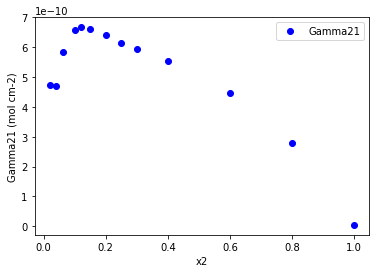

In [ ]:
R=8314 #mN m/(K mol)
T=298 #K
Gamma21=-(1.0/(R*T))*dpol4(lna2,*paramgamma)*0.0001 # para que quede en unidades de mol cm-2

#Grafico
plt.plot(x2,Gamma21,'bo',label='Gamma21') 
plt.xlabel('x2') #Rótulo de eje horizontal
plt.ylabel('Gamma21 (mol cm-2)') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla


¿Qué puede concluir a partir de esto? ¿Se encuentra en exceso o en defecto en la superficie en relación con la fase líquida?

**c)** Si la solución fuera ideal:

$$
\Gamma_{2(1)}=-\frac{1}{RT} \left ( \frac{\partial \gamma}{\partial \ln x{_{2}}} \right )_{T}
$$

Igual que antes, *ajustaremos* $\gamma$ como función de $\ln x_{2}$ por un polinomio de grado 4 y derivaremos la expresión analítica.



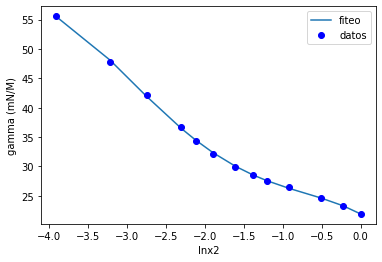

R2 para ajuste:  0.9998020556850495


In [ ]:
#análogamente a lo anterior
lnx2=np.log(x2)
paramgammaI,pcovgammaI = curve_fit(pol4,lnx2, gamma) 
gammapredI=pol4(lnx2,*paramgammaI) 
plt.plot(lnx2,gammapredI,label="fiteo") 
plt.plot(lnx2,gamma,'bo', label="datos") 
plt.xlabel('lnx2') #Rótulo de eje horizontal
plt.ylabel('gamma (mN/M)') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla
print("R2 para ajuste: ", r2_score(gamma, gammapredI))

Y ahora calculamos $\Gamma_{2(1)}$ en función de $x_{2}$:

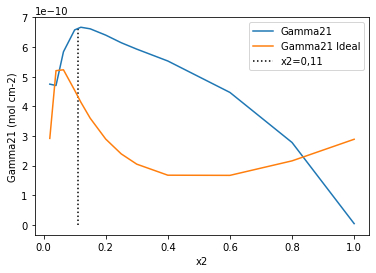

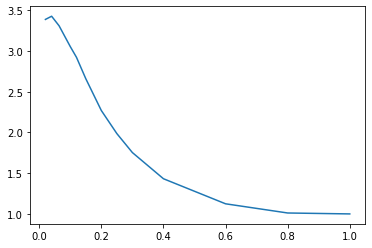

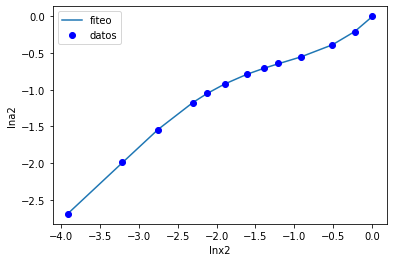

R2 para ajuste:  0.9998906104171789


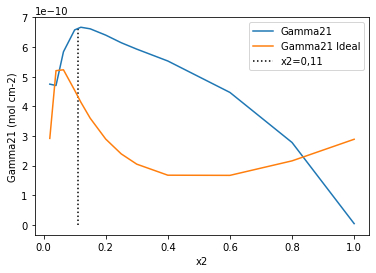

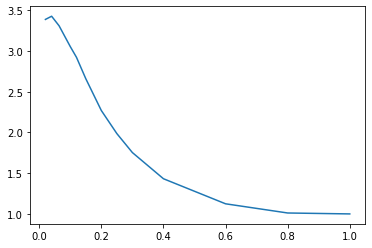

In [7]:
Gamma21I=-(1.0/(R*T))*dpol4(lnx2,*paramgammaI)*0.0001 # para que quede en unidades de mol cm-2

#Grafico
plt.plot(x2,Gamma21,label='Gamma21') 
plt.plot(x2,Gamma21I,label='Gamma21 Ideal') 
plt.vlines(x = 0.11, ymin = 0, ymax =max(Gamma21),linestyles='dotted',label = 'x2=0,11') #Agrego linea vertical en x2=0,11
plt.xlabel('x2') #Rótulo de eje horizontal
plt.ylabel('Gamma21 (mol cm-2)') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla
plt.plot(x2,p2/(p2puro*x2),label="fiteo") 
plt.show() #Para mostrar graficar la figura en pantalla

paramlna2,pcovlna2 = curve_fit(pol4,lnx2, lna2) 
lna2pred=pol4(lnx2,*paramlna2) 
plt.plot(lnx2,lna2pred,label="fiteo") 
plt.plot(lnx2,lna2,'bo', label="datos") 
plt.xlabel('lnx2') #Rótulo de eje horizontal
plt.ylabel('lna2') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla
print("R2 para ajuste: ", r2_score(lna2, lna2pred))


#Grafico
plt.plot(x2,Gamma21,label='Gamma21') 
plt.plot(x2,Gamma21I,label='Gamma21 Ideal') 
plt.vlines(x = 0.11, ymin = 0, ymax =max(Gamma21),linestyles='dotted',label = 'x2=0,11') #Agrego linea vertical en x2=0,11
plt.xlabel('x2') #Rótulo de eje horizontal
plt.ylabel('Gamma21 (mol cm-2)') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla
plt.plot(x2,p2/(p2puro*x2),label="fiteo") 
plt.show() #Para mostrar graficar la figura en pantalla


Para lo que sigue primero vamos a fitear $\ln a_{2}$ en función de $\ln x_{2}$:

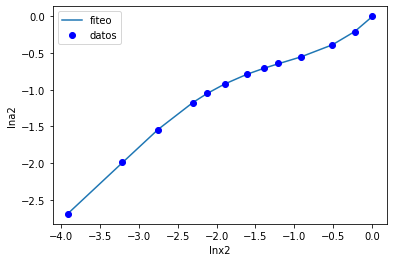

R2 para ajuste:  0.9998906104171789


In [ ]:
paramlna2,pcovlna2 = curve_fit(pol4,lnx2, lna2) 
lna2pred=pol4(lnx2,*paramlna2) 
plt.plot(lnx2,lna2pred,label="fiteo") 
plt.plot(lnx2,lna2,'bo', label="datos") 
plt.xlabel('lnx2') #Rótulo de eje horizontal
plt.ylabel('lna2') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla
print("R2 para ajuste: ", r2_score(lna2, lna2pred))


¿Cómo debería lucir este gráfico si el comportamiento fuera ideal?

Y por último calculo el error relativo porcentual ($ER\ \%$) como:

$$ER\ \%=\frac{|\Gamma^{\text{ideal}}_{2(1)}-\Gamma_{2(1)}|}{\Gamma_{2(1)}}\times 100$$

In [ ]:
#Queremos evaluar un punto nada más, pero nuestras funciones trabajan con arrays de numpy
#Por ello, comenzaremos definiendo un array con un único elemento
puntox2=np.array([0.11])
lnpuntox2=np.log(puntox2)
lnpuntoa2=pol4(lnpuntox2,*paramlna2)

valorideal=-(1.0/(R*T))*dpol4(lnpuntox2,*paramgammaI)*0.0001 # para que quede en unidades de mol cm-2
valor=-(1.0/(R*T))*dpol4(lnpuntoa2,*paramgamma)*0.0001 # para que quede en unidades de mol cm-2

error=100*(abs(valor-valorideal))/valor
print("El error relativo porcentual para x2=0,11 es: ", error)

El error relativo porcentual para x2=0,11 es:  [34.72622428]
